In [1]:
# Import the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv file using 'read-csv' method

data = pd.read_csv('SurfaceWaterQualityDataset.csv', encoding='ISO-8859-1')
data.info()

/var/folders/gk/st927tjd7x52sv1tg0v35fvm0000gn/T/ipykernel_86444/2337662044.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SurfaceWaterQualityDataset.csv', encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428106 entries, 0 to 428105
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              428106 non-null  int64  
 1   Station               428106 non-null  object 
 2   GPS Coordinate North  428106 non-null  float64
 3   GPS Coordinate West   428106 non-null  object 
 4   Parameter             428106 non-null  object 
 5   Lab                   428106 non-null  object 
 6   Result                428106 non-null  object 
 7   Unit                  428106 non-null  object 
 8   datetime              428106 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.4+ MB


## Step I. Data Cleaning

#### 1. Check for data inconsistencies

(a) From the above response we can see that the attribute 'GPS Coordinate West' is of type 'object', as it is a coordinate we can convert it to of type 'float64', similar to the datatype of 'GPS Coordinate North'. 

In [3]:
# Use 'astype' method to change data type of a column, mention target data type as argument

data['GPS Coordinate West'] = data['GPS Coordinate West'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428106 entries, 0 to 428105
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              428106 non-null  int64  
 1   Station               428106 non-null  object 
 2   GPS Coordinate North  428106 non-null  float64
 3   GPS Coordinate West   428106 non-null  float64
 4   Parameter             428106 non-null  object 
 5   Lab                   428106 non-null  object 
 6   Result                428106 non-null  object 
 7   Unit                  428106 non-null  object 
 8   datetime              428106 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 29.4+ MB


In [4]:
ind = data[data['Result'] == 'over range'].index
ind

Int64Index([333270, 355118, 355884], dtype='int64')

(b) In the dataset there are many values with the characters < and > in the 'Result' column. There are also 3 string values ('over range') as shown in the above output. We can remove such values to make the column more consistent.

In [5]:
# Use 'contains' method and 'np.NAN' to replace all values in column 'Result' containing '<' or '>' or 'over range'...
# ...with NaN
# These null values will be handled in the next task

data.loc[data['Result'].str.contains('[<>]'), 'Result'] = np.nan
data['Result'] = data['Result'].replace('over range', np.nan)

In [6]:
data.head(20)

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Parameter,Lab,Result,Unit,datetime
0,1,HAMILTON AVE.,39.33673,-76.53967,Copper_Total,Martel,10,ug/L,4/3/1995 13:30
1,2,HAMILTON AVE.,39.33673,-76.53967,Fecal Coliform,Martel,2400,MPN/100ml,4/3/1995 13:30
2,3,HAMILTON AVE.,39.33673,-76.53967,Lead_Total,Martel,40,ug/L,4/3/1995 13:30
3,4,HAMILTON AVE.,39.33673,-76.53967,Oil & Grease,Martel,2.8,mg/L,4/3/1995 13:30
4,5,HAMILTON AVE.,39.33673,-76.53967,Zinc_Total,Martel,20,ug/L,4/3/1995 13:30
5,6,RADECKE AVE.,39.33036,-76.53478,Copper_Total,Martel,20,ug/L,4/3/1995 15:40
6,7,RADECKE AVE.,39.33036,-76.53478,Fecal Coliform,Martel,43,MPN/100ml,4/3/1995 15:40
7,8,RADECKE AVE.,39.33036,-76.53478,Lead_Total,Martel,30,ug/L,4/3/1995 15:40
8,9,RADECKE AVE.,39.33036,-76.53478,Oil & Grease,Martel,NaN,mg/L,4/3/1995 15:40
9,10,RADECKE AVE.,39.33036,-76.53478,Zinc_Total,Martel,30,ug/L,4/3/1995 15:40


In [7]:
ind2 = data[data['Result'] == 'over range'].index
ind2

Int64Index([], dtype='int64')

From the above outputs we can see that all the values which contain '<' or '>' or 'over range' in the 'Result' column have been replaced with NaN.

(c) Now convert the 'Result' column to numeric type.

In [8]:
data['Result'] = data['Result'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428106 entries, 0 to 428105
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              428106 non-null  int64  
 1   Station               428106 non-null  object 
 2   GPS Coordinate North  428106 non-null  float64
 3   GPS Coordinate West   428106 non-null  float64
 4   Parameter             428106 non-null  object 
 5   Lab                   428106 non-null  object 
 6   Result                397800 non-null  float64
 7   Unit                  428106 non-null  object 
 8   datetime              428106 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 29.4+ MB


#### 2. Check for null values

In [9]:
# Use 'isnull' method to check for null values, and then 'sum' method to get the total count of null values

nullValues = data.isnull()
nullValues.sum()

OBJECTID                    0
Station                     0
GPS Coordinate North        0
GPS Coordinate West         0
Parameter                   0
Lab                         0
Result                  30306
Unit                        0
datetime                    0
dtype: int64

From the above output we can see that there are 30303 null values in the 'Result' column.

In [10]:
# Use 'dropna' method to remove the null values

data = data.dropna()

In [11]:
# Check if all null values are removed

data.isnull().sum()

OBJECTID                0
Station                 0
GPS Coordinate North    0
GPS Coordinate West     0
Parameter               0
Lab                     0
Result                  0
Unit                    0
datetime                0
dtype: int64

From the above output we can see that there are no null values in the dataset.

#### 3. Checking for redundant values

In [12]:
# Use 'duplicated' method to check for null values, and then 'sum' method to get the total count of redundant values

redundantValues = data.duplicated()
redundantValues.sum()

0

From the above output we can see that there are no redundant values.

With above 3 steps, data cleaning is completed.

## Step II. Data Pre-Processing 

#### 1. Extract the year from 'datetime' column. We need the year value to perform year wise analysis on the parameter and result columns. 

In [13]:
# First, use 'to_datetime' method to convert 'datetime' column to datetime format

data['datetime'] = pd.to_datetime(data['datetime'])

# Use 'dt.year' property to extract year from 'datetime' column

data['Year'] = data['datetime'].dt.year

/var/folders/gk/st927tjd7x52sv1tg0v35fvm0000gn/T/ipykernel_86444/1242367232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])
/var/folders/gk/st927tjd7x52sv1tg0v35fvm0000gn/T/ipykernel_86444/1242367232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


In [14]:
data

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Parameter,Lab,Result,Unit,datetime,Year
0,1,HAMILTON AVE.,39.33673,-76.53967,Copper_Total,Martel,10.00,ug/L,1995-04-03 13:30:00,1995
1,2,HAMILTON AVE.,39.33673,-76.53967,Fecal Coliform,Martel,2400.00,MPN/100ml,1995-04-03 13:30:00,1995
2,3,HAMILTON AVE.,39.33673,-76.53967,Lead_Total,Martel,40.00,ug/L,1995-04-03 13:30:00,1995
3,4,HAMILTON AVE.,39.33673,-76.53967,Oil & Grease,Martel,2.80,mg/L,1995-04-03 13:30:00,1995
4,5,HAMILTON AVE.,39.33673,-76.53967,Zinc_Total,Martel,20.00,ug/L,1995-04-03 13:30:00,1995
...,...,...,...,...,...,...,...,...,...,...
428101,428102,STONY RUN @ GILMAN,39.36086,-76.62985,Conductivity,WQM Field,572.00,umhos,2022-12-30 15:54:00,2022
428102,428103,STONY RUN @ GILMAN,39.36086,-76.62985,Dissolved Oxygen,WQM Field,11.80,mg/L,2022-12-30 15:54:00,2022
428103,428104,STONY RUN @ GILMAN,39.36086,-76.62985,Hach Ammonia-Nitrogen,WQM Field,0.00,mg/L,2022-12-30 15:54:00,2022
428104,428105,STONY RUN @ GILMAN,39.36086,-76.62985,pH,WQM Field,7.42,pH units,2022-12-30 15:54:00,2022


#### 2. Add a new column called 'Parameter' & 'Unit' by concatinating 'Unit' to 'Parameter'. We use this new column in the analysis involving 'Parameter' column.

In [15]:
# Use 'apply' method and f-string to add brackets to 'Unit' column

data['Unit'] = data['Unit'].apply(lambda x: f"({x})")

/var/folders/gk/st927tjd7x52sv1tg0v35fvm0000gn/T/ipykernel_86444/447367043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Unit'] = data['Unit'].apply(lambda x: f"({x})")


In [16]:
data

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Parameter,Lab,Result,Unit,datetime,Year
0,1,HAMILTON AVE.,39.33673,-76.53967,Copper_Total,Martel,10.00,(ug/L),1995-04-03 13:30:00,1995
1,2,HAMILTON AVE.,39.33673,-76.53967,Fecal Coliform,Martel,2400.00,(MPN/100ml),1995-04-03 13:30:00,1995
2,3,HAMILTON AVE.,39.33673,-76.53967,Lead_Total,Martel,40.00,(ug/L),1995-04-03 13:30:00,1995
3,4,HAMILTON AVE.,39.33673,-76.53967,Oil & Grease,Martel,2.80,(mg/L),1995-04-03 13:30:00,1995
4,5,HAMILTON AVE.,39.33673,-76.53967,Zinc_Total,Martel,20.00,(ug/L),1995-04-03 13:30:00,1995
...,...,...,...,...,...,...,...,...,...,...
428101,428102,STONY RUN @ GILMAN,39.36086,-76.62985,Conductivity,WQM Field,572.00,(umhos),2022-12-30 15:54:00,2022
428102,428103,STONY RUN @ GILMAN,39.36086,-76.62985,Dissolved Oxygen,WQM Field,11.80,(mg/L),2022-12-30 15:54:00,2022
428103,428104,STONY RUN @ GILMAN,39.36086,-76.62985,Hach Ammonia-Nitrogen,WQM Field,0.00,(mg/L),2022-12-30 15:54:00,2022
428104,428105,STONY RUN @ GILMAN,39.36086,-76.62985,pH,WQM Field,7.42,(pH units),2022-12-30 15:54:00,2022


In [17]:
# Use + operator to concat 'Parameter' and 'Unit' columns

data['Parameter & Unit'] = data['Parameter']+ " " + data['Unit']

/var/folders/gk/st927tjd7x52sv1tg0v35fvm0000gn/T/ipykernel_86444/1345329200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parameter & Unit'] = data['Parameter']+ " " + data['Unit']


In [18]:
data

,OBJECTID,Station,GPS Coordinate North,GPS Coordinate West,Parameter,Lab,Result,Unit,datetime,Year,Parameter & Unit
0,1,HAMILTON AVE.,39.33673,-76.53967,Copper_Total,Martel,10.00,(ug/L),1995-04-03 13:30:00,1995,Copper_Total (ug/L)
1,2,HAMILTON AVE.,39.33673,-76.53967,Fecal Coliform,Martel,2400.00,(MPN/100ml),1995-04-03 13:30:00,1995,Fecal Coliform (MPN/100ml)
2,3,HAMILTON AVE.,39.33673,-76.53967,Lead_Total,Martel,40.00,(ug/L),1995-04-03 13:30:00,1995,Lead_Total (ug/L)
3,4,HAMILTON AVE.,39.33673,-76.53967,Oil & Grease,Martel,2.80,(mg/L),1995-04-03 13:30:00,1995,Oil & Grease (mg/L)
4,5,HAMILTON AVE.,39.33673,-76.53967,Zinc_Total,Martel,20.00,(ug/L),1995-04-03 13:30:00,1995,Zinc_Total (ug/L)
...,...,...,...,...,...,...,...,...,...,...,...
428101,428102,STONY RUN @ GILMAN,39.36086,-76.62985,Conductivity,WQM Field,572.00,(umhos),2022-12-30 15:54:00,2022,Conductivity (umhos)
428102,428103,STONY RUN @ GILMAN,39.36086,-76.62985,Dissolved Oxygen,WQM Field,11.80,(mg/L),2022-12-30 15:54:00,2022,Dissolved Oxygen (mg/L)
428103,428104,STONY RUN @ GILMAN,39.36086,-76.62985,Hach Ammonia-Nitrogen,WQM Field,0.00,(mg/L),2022-12-30 15:54:00,2022,Hach Ammonia-Nitrogen (mg/L)
428104,428105,STONY RUN @ GILMAN,39.36086,-76.62985,pH,WQM Field,7.42,(pH units),2022-12-30 15:54:00,2022,pH (pH units)


## Step III. Exploratory Data Analysis

- #### Lab wise number of tests

In [19]:
# Use 'value_counts' method to get frequency of each unique value in 'Lab' column

labWiseTestCount = data['Lab'].value_counts()
labWiseTestCount

WQM Field        278189
BRWWTP Lab        44562
WQM Lab           24292
Martel            22918
ALS-MDT           16804
PWWTP Lab          9153
CTE                1454
Microbac            393
Ashburton Lab        35
Name: Lab, dtype: int64

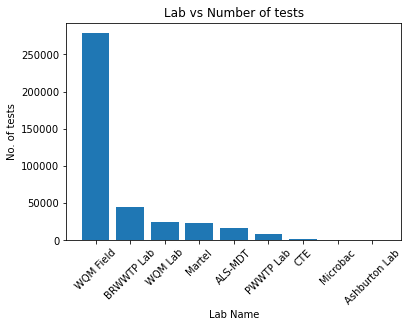

In [20]:
x = labWiseTestCount.index
y = labWiseTestCount.values

# Create a bar graph

plt.bar(x, y)

# Add title and labels

plt.title('Lab vs Number of tests')
plt.xlabel('Lab Name')
plt.ylabel('No. of tests')

# Rotate x-axis labels by 45 degrees

plt.xticks(rotation=45)

# Show the plot

plt.show()

From the above graph we can see that the lab WQM Field has performed the highest number of tests which is more than 250K tests. And the labs Microbac and Aushburton Lab have relatively performed very few tests.

- #### Parameter wise average results

In [21]:
parameterResultAvg = data.groupby('Parameter & Unit')['Result'].mean()
parameterResultAvg.sort_values(ascending=False)

Parameter & Unit
Total Coliform (MPN/100ml)             64740.806895
Fecal Coliform (MPN/100ml)             22990.363157
E. Coli (MPN/100ml)                     3527.869068
Enterococcus (MPN/100ml)                3462.769181
Conductivity (umhos)                    1562.488954
Chloride (mg/L)                          569.527153
Iron, Total (ug/L)                       488.000000
Hardness (mg/L)                          256.370550
Sodium (mg/L)                             80.315740
Chromium_Dissolved (ug/L)                 51.141687
COD (mg/L)                                48.480121
Chromium_Total (ug/L)                     39.114134
Zinc_Total (ug/L)                         37.517804
Zinc_Dissolved (ug/L)                     25.797671
Total Phenolics (ug/L)                    24.250000
Water Temperature (degrees Celsius)       14.742247
Zinc, Total (ug/L)                        14.450000
Dissolved Oxygen (mg/L)                   10.181689
Copper_Total (ug/L)                        9.30

From the above output we can see that the parameters 'Total Coliform (MPN/100ml)' and 'Fecal Coliform (MPN/100ml)' are present in large quantities and these results are above permissible limits. These parameters are followed by 'E. Coli (MPN/100ml)' and 'Enterococcus (MPN/100ml)', which are similarly in very high quantities and are above the permissible limits.

The quantities of the parameters 'Chlorine_Spec (mg/L)' and 'Ortho-Phosphate (mg/L)' are very low in the collected water samples and are below the allowed limits.

Divide the 'parameterResultAvg' series object based on the average result so that they can be visualized properly.

In [22]:
parameterResultAvg_One = parameterResultAvg[parameterResultAvg.values < 81]
parameterResultAvg_One

Parameter & Unit
Ammonia-Nitrogen (mg/L)                 0.295134
Antimony_Dissolved (ug/L)               2.957000
Antimony_Total (ug/L)                   3.206453
Arsenic_Dissolved (ug/L)                1.356930
Arsenic_Total (ug/L)                    2.465877
BOD5 (mg/L)                             5.731194
COD (mg/L)                             48.480121
Cadmium_Dissolved (ug/L)                0.292500
Cadmium_Total (ug/L)                    1.007674
Chlorine (mg/L)                         0.203883
Chlorine_Spec (mg/L)                    0.033280
Chromium_Dissolved (ug/L)              51.141687
Chromium_Total (ug/L)                  39.114134
Copper, Total (ug/L)                    5.600000
Copper_Dissolved (ug/L)                 5.230875
Copper_Total (ug/L)                     9.306457
Dissolved Oxygen (mg/L)                10.181689
Fluoride (mg/L)                         0.331282
Hach Ammonia-Nitrogen (mg/L)            0.166882
Lead_Dissolved (ug/L)                   1.259129
Lea

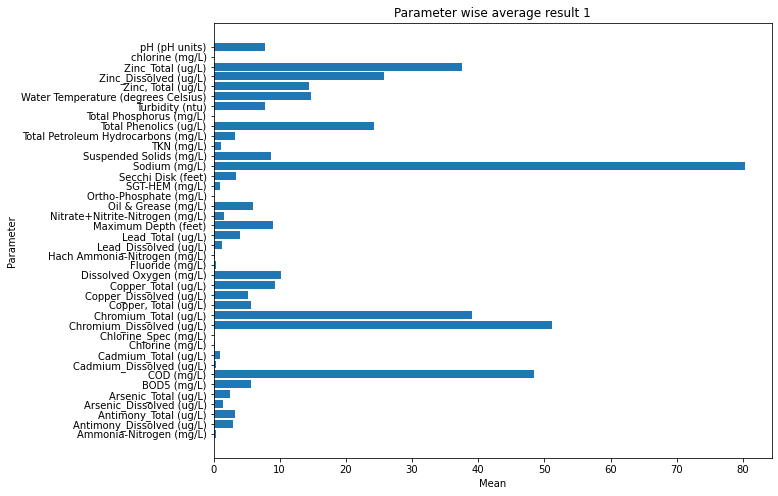

In [23]:
x = parameterResultAvg_One.index
y = parameterResultAvg_One.values

# Create horizontal bar plot

plt.figure(figsize=(10, 8))
plt.barh(x, y)

# Add title and labels

plt.title('Parameter wise average result 1')
plt.xlabel('Mean')
plt.ylabel('Parameter')

# Show the plot 

plt.show()

In [24]:
parameterResultAvg_Two = parameterResultAvg[parameterResultAvg.values >= 81]
parameterResultAvg_Two

Parameter & Unit
Chloride (mg/L)                 569.527153
Conductivity (umhos)           1562.488954
E. Coli (MPN/100ml)            3527.869068
Enterococcus (MPN/100ml)       3462.769181
Fecal Coliform (MPN/100ml)    22990.363157
Hardness (mg/L)                 256.370550
Iron, Total (ug/L)              488.000000
Total Coliform (MPN/100ml)    64740.806895
Name: Result, dtype: float64

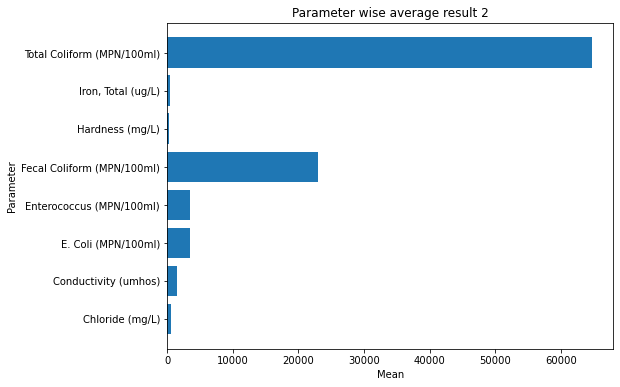

In [25]:
x = parameterResultAvg_Two.index
y = parameterResultAvg_Two.values

# Create horizontal bar plot

plt.figure(figsize=(8, 6))
plt.barh(x, y)

# Add title and labels

plt.title('Parameter wise average result 2')
plt.xlabel('Mean')
plt.ylabel('Parameter')

# Show the plot 

plt.show()

- #### Year wise average result for each parameter.

In [26]:
# Use 'groupby' method to group the data by Year and Parameter, and use 'mean' to get the average for each group

temp = data[['Year', 'Parameter', 'Result']]
yearParameterAvg = temp.groupby(['Year', 'Parameter']).mean('Result')

# Use 'sort_values' method to sort the values on 'Year' and then on 'Parameter' column

yearParameterAvg.sort_values(by=['Year', 'Parameter'], ascending=True, inplace=True)

# Use 'rename' method to rename the 'Result' column to 'Result Average'

yearParameterAvg.rename(columns={'Result': 'Result Average'}, inplace=True)
yearParameterAvg

Result Average
Year Parameter                        
1995 Ammonia-Nitrogen         0.458800
     BOD5                    30.135135
     COD                     22.500000
     Cadmium_Total           30.000000
     Chloride                79.875000
...                                ...
2022 Total Phosphorus         0.042395
     Turbidity                9.827831
     Water Temperature       14.561327
     Zinc, Total             17.200000
     pH                       7.823401

[710 rows x 1 columns]

In [27]:
# Print year wise each parameter average result

year = data['Year'].unique()
for y in year:
    print('Data for year', y)
    print('\n')
    print(yearParameterAvg.loc[y])
    print('\n')

Data for year 1995


                          Result Average
Parameter                               
Ammonia-Nitrogen                0.458800
BOD5                           30.135135
COD                            22.500000
Cadmium_Total                  30.000000
Chloride                       79.875000
Conductivity                  398.076923
Copper_Total                   28.181818
Fecal Coliform              22944.900000
Fluoride                        0.124000
Lead_Total                     57.812500
Nitrate+Nitrite-Nitrogen        3.654384
Oil & Grease                    3.904545
Suspended Solids               10.393939
TKN                             2.948529
Total Phosphorus                0.423281
Water Temperature              17.261000
Zinc_Total                     72.025316
pH                              7.365500


Data for year 1996


                          Result Average
Parameter                               
Ammonia-Nitrogen                1.071698
BOD5         

From the above output we can see that Ammonia-Nitrogen and BOD5 are some of the parameters whose quantities have reduced due course of time.

- #### Station wise average result for each parameter.

In [28]:
# Use 'groupby' method to group the data by Station and Parameter, and use 'mean' to get the average for each group

temp = data[['Station', 'Parameter', 'Result']]
stationParameterAvg = temp.groupby(['Station', 'Parameter']).mean('Result')

# Use 'sort_values' method to sort the values on 'Station' and then on 'Parameter' column

stationParameterAvg.sort_values(by=['Station', 'Parameter'], ascending=True, inplace=True)

# Use 'rename' method to rename the 'Result' column to 'Result Average'

stationParameterAvg.rename(columns={'Result': 'Result Average'}, inplace=True)
stationParameterAvg

Result Average
Station        Parameter                            
1201 S PACA ST Chlorine_Spec                0.372857
               Conductivity               630.375000
               Dissolved Oxygen             8.515000
               Hach Ammonia-Nitrogen        0.085714
               Turbidity                   15.700000
...                                              ...
WYNDHURST AVE. Dissolved Oxygen            10.426552
               Hach Ammonia-Nitrogen        0.130716
               Turbidity                    2.665859
               Water Temperature           13.712115
               pH                           7.728413

[2280 rows x 1 columns]

In [29]:
# Print station wise each parameter average result

station = data['Station'].unique()
for st in station:
    print('Data for station', st)
    print('\n')
    print(stationParameterAvg.loc[st])
    print('\n')

Data for station HAMILTON AVE.


                              Result Average
Parameter                                   
Ammonia-Nitrogen                    0.791975
Antimony_Total                      4.236667
Arsenic_Dissolved                   1.692500
Arsenic_Total                       1.769091
BOD5                                5.500448
COD                                31.285020
Cadmium_Dissolved                   0.151000
Cadmium_Total                       0.285250
Chloride                           95.044938
Chlorine                            0.500000
Chlorine_Spec                       0.025521
Chromium_Dissolved                  1.570000
Chromium_Total                      2.216667
Conductivity                      575.536340
Copper, Total                       5.200000
Copper_Dissolved                    4.585408
Copper_Total                       11.379966
Dissolved Oxygen                    9.978585
E. Coli                          4135.192208
Fecal Coliform        

pH                           7.799375


Data for station NORTH AVE LIGHT RAIL


                       Result Average
Parameter                            
Chlorine_Spec                0.032500
Conductivity               856.600000
Dissolved Oxygen             9.464000
Hach Ammonia-Nitrogen        0.185625
Turbidity                    6.830000
Water Temperature           17.773333
pH                           8.082000


Data for station NORTH AVE. (Outfall)


                       Result Average
Parameter                            
Chlorine_Spec                0.017895
Conductivity              1434.210526
Dissolved Oxygen             8.976500
Hach Ammonia-Nitrogen        0.260526
Turbidity                   26.000000
Water Temperature           16.655000
pH                           7.863684


Data for station WYMAN PARK POND (OUTALL BELOW TOP POND)


                       Result Average
Parameter                            
Chlorine_Spec                0.018333
Conductivity       

- #### Average result of each parameter in different stations

In [30]:
# Use 'groupby' method to group the data by Station and Parameter, and use 'mean' to get the average for each group

temp = data[['Parameter', 'Station', 'Result']]
parameterStationAvg = temp.groupby(['Parameter', 'Station']).mean('Result')

# Use 'sort_values' method to sort the values on 'Parameter' and then on 'Result' column

parameterStationAvg.sort_values(by=['Parameter', 'Result'], ascending=[True, False], inplace=True)

# Use 'rename' method to rename the 'Result' column to 'Result Average'

parameterStationAvg.rename(columns={'Result': 'Result Average'}, inplace=True)
parameterStationAvg

Result Average
Parameter        Station                                  
Ammonia-Nitrogen GRUN CARROLL PARK                1.271374
                 HAMILTON AVE.                    0.791975
                 PULASKI HWY.                     0.627566
                 BRANCH AVE.                      0.471261
                 LAKEWOOD AVE.                    0.395909
...                                                    ...
pH               BLOOMFIELD AVE                   7.333077
                 COTSWOLD OUTFALL 42"             7.228756
                 6106 NORTHWOOD DR                6.984706
                 BOXHILL & MELROSE OUTFALL        6.971600
                 SHANNON DR  & ELMORA AVE         6.923333

[2280 rows x 1 columns]

From the above output we can see that, on an average the traces of parameters like 'Ammonia-Nitrogen', 'BOD5', 'COD' etc., are highest in the stations 'GRUN CARROLL PARK', 'RADECKE AVE.', 'CHILDS ST.' etc., respectively. 

## Conclusion

A thorough examination of Baltimore City's surface water quality data can help identify problem areas and set priorities for investments and initiatives aimed at enhancing the quality of the city's water supply. It is crucial to take into account the various elements that may have an impact on water quality and to create a diverse strategy to deal with these difficulties.


Further more, we can identify any operational or capital investment programs that could be put into place by including other potential features in the dataset such as:

1. Weather Data - Weather information: As previously provided, precipitation can significantly affect the quality of the water. Weather information such as rainfall, temperature, and humidity could assist to our understanding of the variables affecting water quality.

2. Population and Demographic data: Considering human activity can affect water quality, it may be useful to include this information when determining where education and awareness initiatives are most needed.

3. Infrastructure Information: Information on the age and condition of stormwater and wastewater infrastructure may help identify places that require renovations or repairs in order to improve the quality of the water.

